In [189]:
from lcapy import Circuit
from numpy import logspace
from lcapy import s, j, pi, f, transfer
import math
from matplotlib.pyplot import savefig

In [190]:
def tf_rc(order=3, res = 1e7, cap = 10e-15, k = 1):
    
    circuit = """
    .param k=1
    P1 1 0; v=v_i(t);\n"""
    
    for i in range(order):
        kd ="/k"*i
        km = "*k"*i
        circuit+="""R""" + str(i+1) + """ """+ str(i+1) + """ """+ str(i+2) + """ {R""" + km+ """};\n"""
        circuit+="""C""" + str(i+1) + """ """+ str(i+2) + """ """+ str(0) + """ {C""" + kd+ """};\n"""
        
    circuit += """P2 """+str(order+1)+""" 0; v^=v_o(t);"""
    return Circuit(circuit).subs({'R': res, 'C': cap, 'k': k})

tf_rc(5, k=2)

.param k=1
P1 1 0; v=v_i(t);
R1 1 2 10000000
C1 2 0 1/100000000000000
R2 2 3 20000000
C2 3 0 1/200000000000000
R3 3 4 40000000
C3 4 0 1/400000000000000
R4 4 5 80000000
C4 5 0 1/800000000000000
R5 5 6 160000000
C5 6 0 1/1600000000000000
P2 6 0; v^=v_o(t);

all small capacitances:  9.817477042468104 4.908738521234052 2.454369260617026
all big capacitances:  2000.0 1000.0 500.0
all small capacitances:  9.817477042468104 3.2724923474893677 1.0908307824964558
all big capacitances:  2000.0 666.6666666666667 222.22222222222223
all small capacitances:  9.817477042468104 2.454369260617026 0.6135923151542565
all big capacitances:  2000.0 500.0 125.0


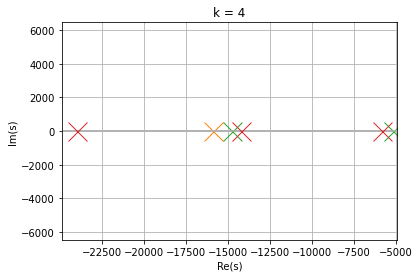

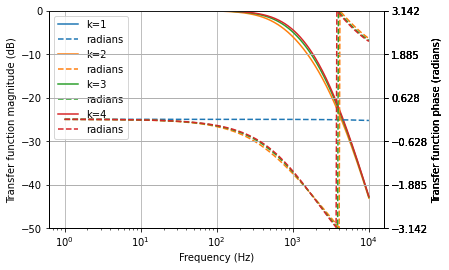

In [192]:
fm = 2.56e6
q = 12
oversample = 256
fc = 2000
capb = 2000e-15
c_sim = """.param k=1
P1 1 0; v=v_i(t);
R1 1 2 20000000
C1 2 0 1/100000000000000
R2 2 3 20000000
C2 3 0 1/200000000000000
R3 3 4 20000000
C3 4 0 1/400000000000000
P2 4 0; v^=v_o(t);"""

c__cim = Circuit(c_sim)
res = 1/(2*math.pi*capb*fc)
cs = capb*(fc/fm)*2*math.pi
# print(res)
k = 1
a_norm = c__cim

a_norm_k = a_norm
H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
ax = H_norm_k.plot(label = "k=1")
ax.set_xlim(-10000, 0)
ax2 = H_norm_k.bode_plot((1, 10000), label="k=1")

for k in [2,3,4]:
    lab = "k="+str(k)
    a_norm_k = tf_rc(3,res,capb,k)
    H_norm_k = a_norm_k.transfer(1, 0, 4, 0)
    print("all small capacitances: ", cs*1e15, cs/k*1e15, cs/k/k*1e15)
    print("all big capacitances: ", capb*1e15, capb/k*1e15, capb/k/k*1e15)
    H_norm_k.plot(axes=ax, label=lab)
    ax.set_title('k = ' + str(k))
    H_norm_k.bode_plot((1, 10000), axes=ax2, label=lab)

savefig("caps.png", dpi=500)

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.fftpack
import librosa

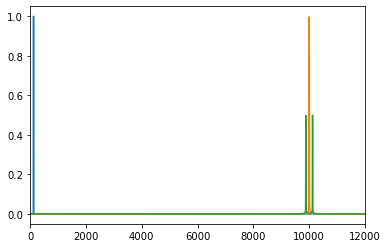

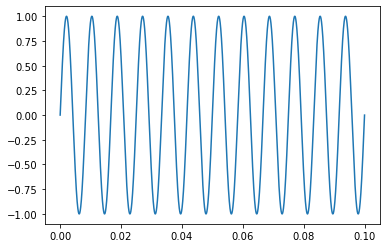

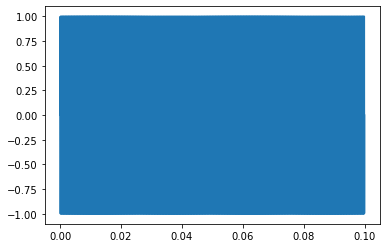

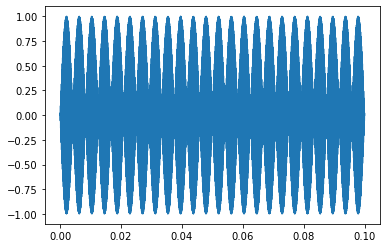

In [43]:
"""
Frequencies
"""
f_signal = 120 #Hz
f_modulation = 10000 #Hz
fs = 22500 #sampling freq
num_samples = fs
length = 0.1/fs ## seconds

amp_signal = 1
phase_signal = 0

amp_modulation = 1
phase_modulation = 0

x = np.linspace(0.0, num_samples*length, num_samples)

sin_sig = amp_signal*np.sin(2*np.pi*f_signal*(x)+phase_signal)
sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)
sin_modulated = sin_sig*sin_modulation

fft_sig = scipy.fftpack.fft(sin_sig)
fft_modulation = scipy.fftpack.fft(sin_modulation)
fft_modulated = scipy.fftpack.fft(sin_modulated)

x_fft = np.linspace(0.0, 1.0/(2.0*length), num_samples//2)

fig, ax = plt.subplots()

ax.plot(x_fft, 2.0/num_samples * np.abs(fft_sig[:num_samples//2]))
ax.plot(x_fft, 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]))
ax.plot(x_fft, 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]))

ax.plot()
plt.xlim(0,12000)
plt.show()
plt.plot(x,sin_sig)
plt.show()
plt.plot(x,sin_modulation)
plt.show()
plt.plot(x,sin_modulated)

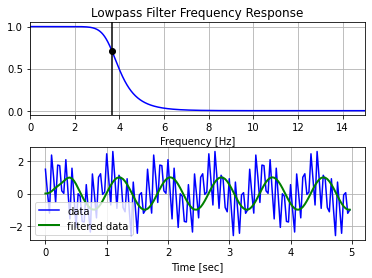

In [56]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

# Calculation for all the capacitances needed. No simulations

In [160]:
## Calling ci the big capacitor for stage i and csi the small capacitor of stage i

fm = 1.28e6 ## modulation frequency: oversampled compared to the fc by the oversampling factor
oversampling = 128
cap_ratio = 150 # ratio of capacitors in the same stage. This reflects the ratio of R and C and will determine the fc
stage_ratio = 3 ## this is the 'k' we were talking about

cs1 = 10e-15
c1 = cs1*cap_ratio ## biggest capacitor in the system, say 10pF

c2 = c1*stage_ratio
cs2 = cs1*stage_ratio

c3 = c2*stage_ratio
cs3 = cs2*stage_ratio

fc = fm/(2*np.pi*cap_ratio)
q = 2*np.pi*cap_ratio/(oversampling)
print("Big capacitances needed: ", str(round(c1*1e12, 2))+"pF", str(round(c2*1e12, 2))+"pF", str(round(c3*1e12, 2))+"pF")
print("Small capacitances needed: ", str(round(cs1*1e15, 2))+"fF", str(round(cs2*1e15, 2))+"fF", str(round(cs3*1e15, 2))+"fF")
print("Cutoff frequency: ", str(round(fc,2)))
print("Q: ", str(round(q,2)))

Big capacitances needed:  1.5pF 4.5pF 13.5pF
Small capacitances needed:  10.0fF 30.0fF 90.0fF
Cutoff frequency:  1358.12
Q:  7.36


In [76]:
## mimcap 10x10
f = 7.7e6
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

206.69 fF


In [75]:
## mimcap 1x1
f = 6e8
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

2.65 fF


In [78]:
## Moscap 0.42x0.15
f = 4.27e9
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

0.37 fF


In [79]:
## mimcap 30x30: max capacitance in a single mimcap
f = 884991
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

1798.38 fF


In [80]:
## mimcap 30x30 and 30x30 in parallel
f = 436565
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

3645.62 fF


In [83]:
## moscap 0.42x0.18
f = 3.87e9
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

0.41 fF


In [84]:
## mimcap 30x30 and 10x10 in parallel
f = 786280
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

2024.15 fF


In [91]:
## moscap 0.42x0.20
f = 3.57e9
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e15, 2))
print(c+" fF")

0.45 fF


In [182]:
## mimcap array
f = 119081
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e12, 2))
print(c+" pF")

13.37 pF


In [184]:
## mimcap array
f = 344140
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e12, 2))
print(c+" pF")

4.62 pF


In [185]:
## mimcap array
f = 1.058e6
r = 1e5
c = str(round((1/(2*np.pi*f*r))*1e12, 2))
print(c+" pF")

1.5 pF


In [188]:
f = 1000
c = 13.37e-12
r = str(round(1/(2*np.pi*f*c)*1e-6,2))
print(r)

11.9
